In [1]:
from scipy.io import loadmat
import numpy as np
import seaborn as sns
from ripser import ripser
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
def plot_n_longest_bars(array, n):
    # Sort the array based on the width of the bars (x_end - x_start)
    sorted_array = sorted(array, key=lambda x: x[1] - x[0], reverse=True)
    
    # Take the first n rows from the sorted array
    n_longest_bars = sorted_array[:n]
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot each of the n longest bars
    for i in range(len(n_longest_bars)):
        x_start, x_end = n_longest_bars[i]
        width = x_end - x_start
        ax.hlines(i, x_start, x_end, linewidth=5, color='black')
    
    # Set plot limits and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(-1, len(n_longest_bars))
    ax.set_xlabel('')
    ax.set_title('')
    
    # Hide y-axis ticks and labels
    ax.set_yticks([])
    ax.set_yticklabels([])
    
    # Hide x-axis ticks and labels
    ax.set_xticks([])
    ax.set_xticklabels([])
    
    # Show grid lines
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.5, color='gray')
    
    plt.xticks(np.arange(0, 1.1, 0.1))
    
    # Show the plot
    plt.show()

In [3]:
data = loadmat('NoormanEtAlFlyWalkingInDarkness2PBehData.mat')

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'DarkData', 'FDB', 'TDB'])

In [5]:
data['DarkData']

array([[(array([[[ 42.27853177,  75.45338271,  89.75104392, ..., 100.94647868,
                 110.29281861, -26.739622  ],
                [ 60.04045304,  60.25511341,  94.52424658, ...,  99.30064071,
                 112.85419069,  17.42966134],
                [ 67.08434236,  55.12187678,  95.75727788, ...,  96.49568564,
                 111.78849008,  52.59494942],
                ...,
                [141.80670014,  62.74419457,  40.93593614, ...,  39.69086469,
                  11.73301232,  97.5805878 ],
                [151.36740111,  61.52941709,  46.65767216, ...,  52.94845233,
                  14.93194617, 109.49762548],
                [165.52291471,  60.57599446,  53.45737441, ...,  72.61154016,
                  21.34652869, 128.87192884]],

               [[ 65.07251922,  49.91434029, 138.14230159, ..., 100.97673064,
                 108.23504219,   2.49095176],
                [ 64.29842884,  58.88269584, 118.99806708, ..., 105.32996997,
                  91.85918972,

In [6]:
all_flies_delta_f_over_f = data['DarkData']['ROI_Data_Dfof'][0][0]
all_flies_bump_position = data['DarkData']['BumpPosition']

In [7]:
all_flies_bump_position[0][0]

array([[-2.11883894, -2.15585785, -2.17779222, ...,  3.11385058,
         3.1255877 ,  3.12758901],
       [ 0.67031817,  0.43724047,  0.3309486 , ..., -0.03547885,
        -0.03502856, -0.13192541],
       [-0.31778657, -0.49115355, -0.56862772, ...,  2.55328565,
         2.51164883,  2.35453445],
       ...,
       [-2.0561217 , -2.03313902, -1.99335164, ..., -0.22497371,
        -0.53054674, -1.35021598],
       [ 2.98203482,  2.90653185,  2.85986426, ..., -2.17393337,
        -2.22677783, -2.42032634],
       [-0.98506473, -1.30921657, -1.56712686, ...,  3.08863849,
         3.06334183,  3.07673179]])

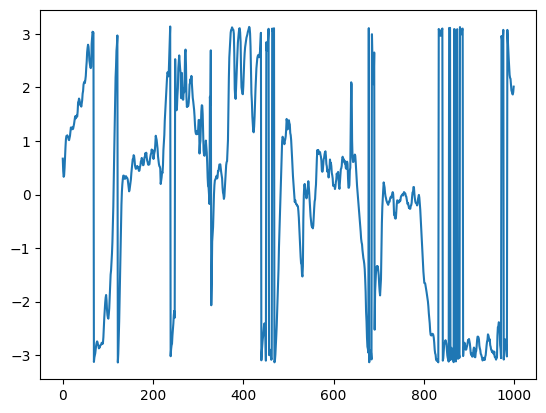

In [8]:
index = 1

plt.plot(range(1000), all_flies_bump_position[0][0][index][:1000])

<Axes: >

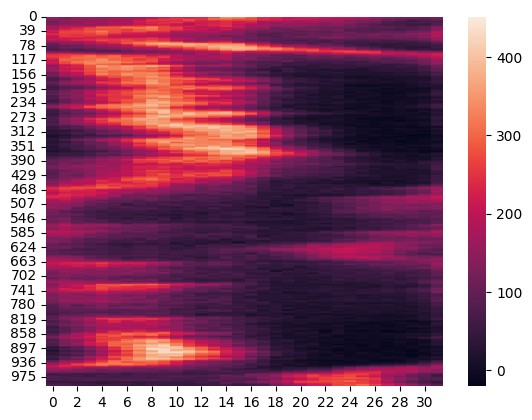

In [9]:
# Neuron 28 has two long bars...?
# Neuron 21 using first 1000 steps is decent

sample_fly_delta_f_over_f = all_flies_delta_f_over_f[:, :, 21].T
sns.heatmap(sample_fly_delta_f_over_f[:1000, :])

[]

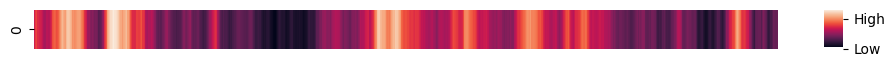

In [10]:
fig, ax = plt.subplots(figsize = (12, .5))

heatmap = sns.heatmap(sample_fly_delta_f_over_f[:1000, :1].T, ax = ax, cbar_kws={"aspect": 2})
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([0, 200])               # Set tick locations
colorbar.set_ticklabels(['Low', 'High'])  
# ax.set_yticks([])
ax.set_xticks([])

[]

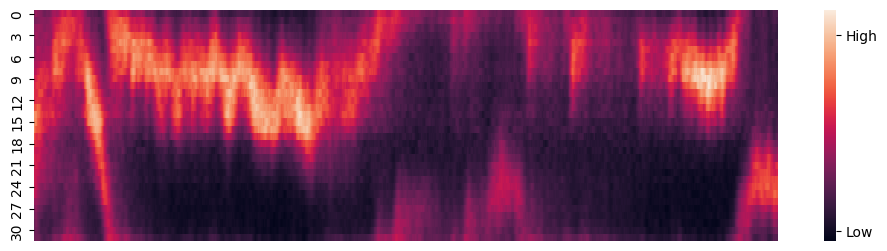

In [11]:
fig, ax = plt.subplots(figsize = (12, 3))

heatmap = sns.heatmap(sample_fly_delta_f_over_f[:1000, :].T, ax = ax)
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([0, 400])               # Set tick locations
colorbar.set_ticklabels(['Low', 'High'])  
ax.set_xticks([])

In [35]:
corr_mat = np.corrcoef(sample_fly_delta_f_over_f.T)

In [ ]:
corr_mat = corr_mat + np.min(corr_mat)

1.0

In [37]:
corr_mat = np.corrcoef(sample_fly_delta_f_over_f.T)
corr_mat = corr_mat - np.min(corr_mat)
corr_mat = corr_mat/np.max(corr_mat)

<Axes: >

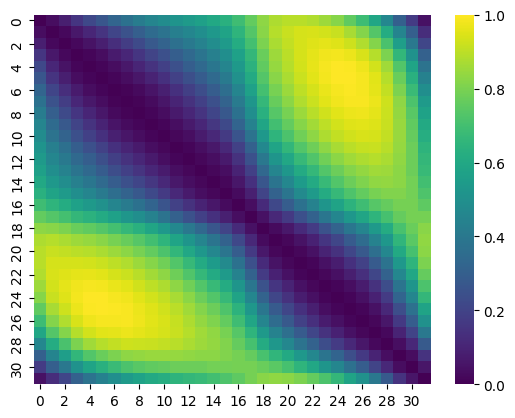

In [39]:
sns.heatmap(1 - corr_mat.T, cmap='viridis')

In [14]:
sample_fly_delta_f_over_f.shape

(12000, 32)

In [15]:
# Downsample and smooth
processed_delta_f_over_f = np.zeros((1000, 32))
for col_index in range(32):
    raw = sample_fly_delta_f_over_f[:, col_index]
    downsampled = raw[:1000]
    smoothed_downsampled = gaussian_filter1d(downsampled, sigma = 1)
    processed_delta_f_over_f[:, col_index] = smoothed_downsampled

processed_delta_f_over_f = processed_delta_f_over_f/np.max(processed_delta_f_over_f)

<Axes: >

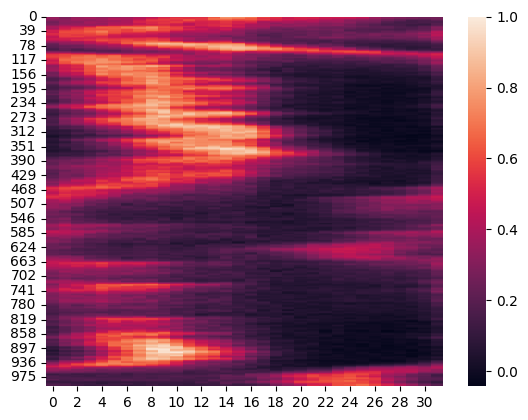

In [16]:
sns.heatmap(processed_delta_f_over_f)

In [17]:
result = ripser(processed_delta_f_over_f)

In [18]:
dim_1_barcode = result['dgms'][1]

In [19]:
print(dim_1_barcode)

[[0.8728649  0.89443618]
 [0.81388158 0.92955732]
 [0.68339455 0.69039959]
 [0.49544281 0.49904394]
 [0.4920418  0.49787793]
 [0.48152098 0.57601875]
 [0.4784306  0.4851304 ]
 [0.47779825 0.48058051]
 [0.47624195 0.52105707]
 [0.47233063 0.47688326]
 [0.47058761 0.52873766]
 [0.44326699 0.45026243]
 [0.41602555 0.7621749 ]
 [0.41500992 0.48586839]
 [0.39979735 0.48247355]
 [0.39057884 0.39800808]
 [0.38049418 0.38058278]
 [0.37446234 0.37472028]
 [0.37371024 0.39527357]
 [0.36905104 0.52837551]
 [0.35565633 0.37653098]
 [0.34403071 0.3442685 ]
 [0.34226179 0.35146526]
 [0.32170409 0.33943173]
 [0.31780851 0.32144117]
 [0.3116729  0.37543589]
 [0.30406782 0.3054634 ]
 [0.29806811 0.32204637]
 [0.29581162 0.29737276]
 [0.29468155 0.29679227]
 [0.29386613 0.29716063]
 [0.29359415 0.2943888 ]
 [0.29117242 0.29330239]
 [0.28786969 0.29411349]
 [0.27941221 0.37137347]
 [0.2750161  0.27519372]
 [0.27338251 0.27915734]
 [0.27238968 0.27267197]
 [0.26922134 0.35560709]
 [0.26697379 0.28007016]


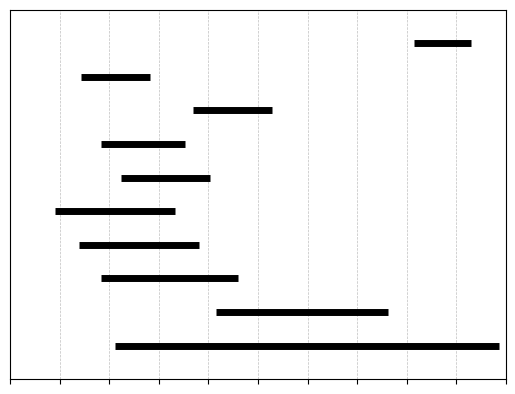

In [20]:
plot_n_longest_bars(dim_1_barcode, 10)

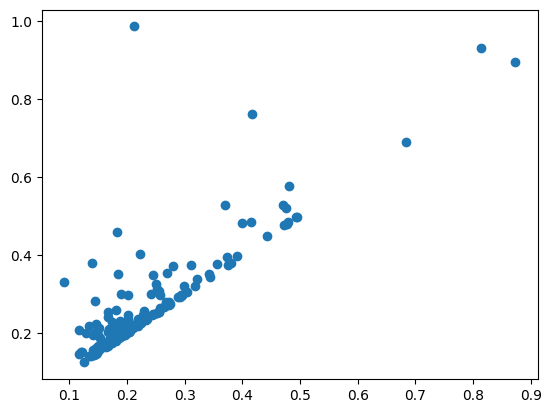

In [21]:
plt.scatter(dim_1_barcode[:, 0], dim_1_barcode[:, 1])

In [22]:
X_scaled = StandardScaler().fit_transform(sample_fly_delta_f_over_f)

In [23]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X_scaled)

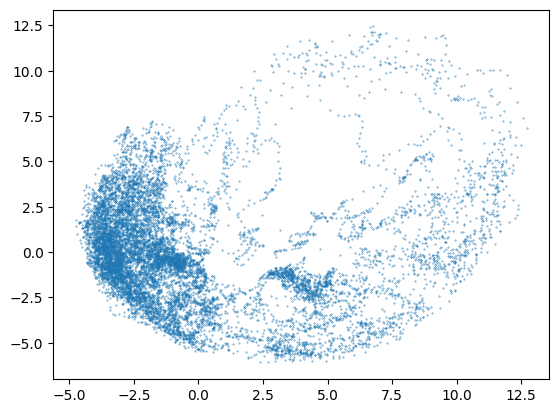

In [24]:
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], s = 0.1)